In [1]:
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
ampl = pd.read_csv("../data/ampl_portfolio_weights.csv", index_col=0)
ga = pd.read_csv("../data/ga_portfolio_weights.csv", index_col=0)

combined = pd.concat([ampl, ga], axis=1)
combined.columns = ['AMPL', 'GA']
combined = combined.fillna(0)

print(combined)

# Optional: Save combined file
combined.to_csv("../data/combined_portfolio_weights.csv")
print("✅ Combined weights saved to: combined_portfolio_weights.csv")


          AMPL        GA
AAPL   0.58473  0.055385
MSFT   0.41527  0.085782
AMZN   0.00000  0.137126
GOOGL  0.00000  0.112936
JNJ    0.00000  0.084561
JPM    0.00000  0.078762
XOM    0.00000  0.115955
NVDA   0.00000  0.143427
PG     0.00000  0.108273
UNH    0.00000  0.077792
✅ Combined weights saved to: combined_portfolio_weights.csv


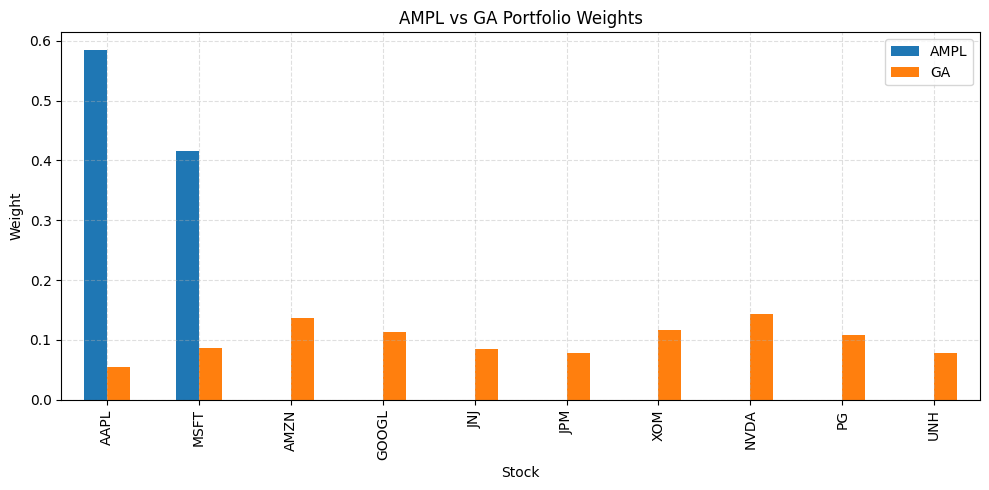

In [3]:
# Plot
combined.plot(kind='bar', figsize=(10, 5), title='AMPL vs GA Portfolio Weights')
plt.ylabel("Weight")
plt.xlabel("Stock")
plt.grid(True, linestyle='--', alpha=0.4)
plt.tight_layout()
plt.show()

In [4]:
# L1 and L2 distances
l1_dist = (combined['AMPL'] - combined['GA']).abs().sum()
l2_dist = ((combined['AMPL'] - combined['GA'])**2).sum()**0.5

print(f"📏 L1 Distance (Total absolute diff): {l1_dist:.4f}")
print(f"📐 L2 Distance (Euclidean norm):     {l2_dist:.4f}")


📏 L1 Distance (Total absolute diff): 1.7177
📐 L2 Distance (Euclidean norm):     0.6968


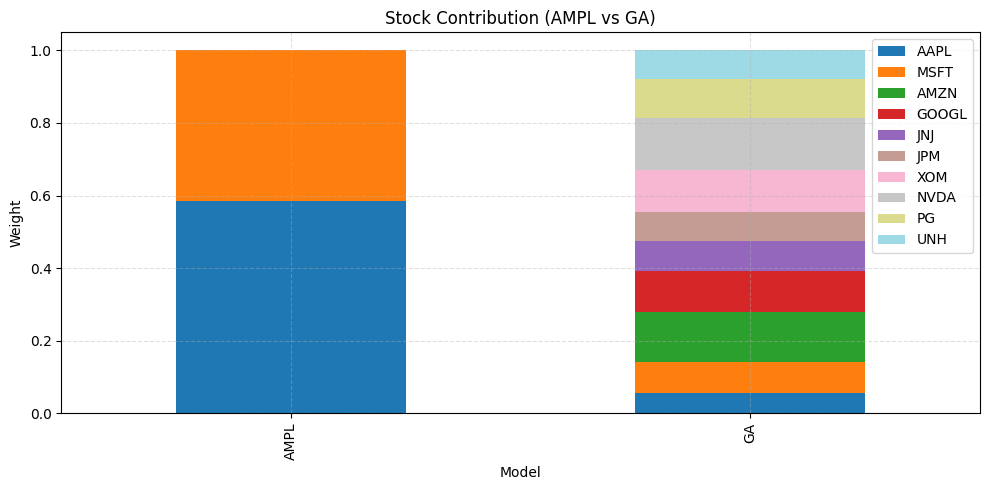

In [5]:
combined.T.plot(kind='bar', stacked=True, figsize=(10, 5), colormap='tab20', title='Stock Contribution (AMPL vs GA)')
plt.ylabel("Weight")
plt.xlabel("Model")
plt.grid(True, linestyle='--', alpha=0.4)
plt.tight_layout()
plt.show()


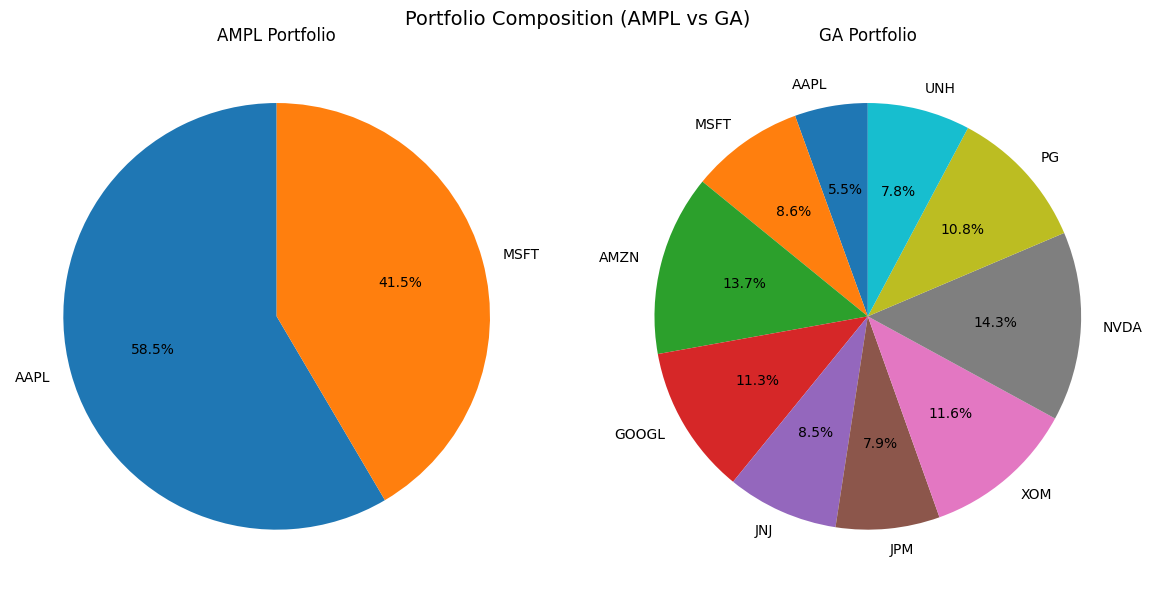

In [6]:
fig, axs = plt.subplots(1, 2, figsize=(12, 6))

combined['AMPL'][combined['AMPL'] > 0].plot.pie(ax=axs[0], autopct='%1.1f%%', startangle=90)
axs[0].set_title("AMPL Portfolio")
axs[0].set_ylabel("")

combined['GA'][combined['GA'] > 0].plot.pie(ax=axs[1], autopct='%1.1f%%', startangle=90)
axs[1].set_title("GA Portfolio")
axs[1].set_ylabel("")

plt.suptitle("Portfolio Composition (AMPL vs GA)", fontsize=14)
plt.tight_layout()
plt.show()


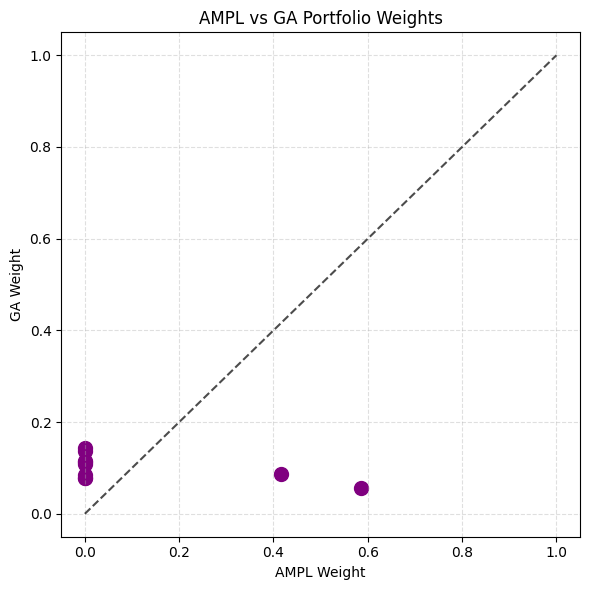

In [7]:
combined.plot(kind='scatter', x='AMPL', y='GA', figsize=(6,6), color='purple', s=100)
plt.plot([0, 1], [0, 1], 'k--', alpha=0.7)  # Diagonal reference line
plt.title("AMPL vs GA Portfolio Weights")
plt.xlabel("AMPL Weight")
plt.ylabel("GA Weight")
plt.grid(True, linestyle='--', alpha=0.4)
plt.tight_layout()
plt.show()


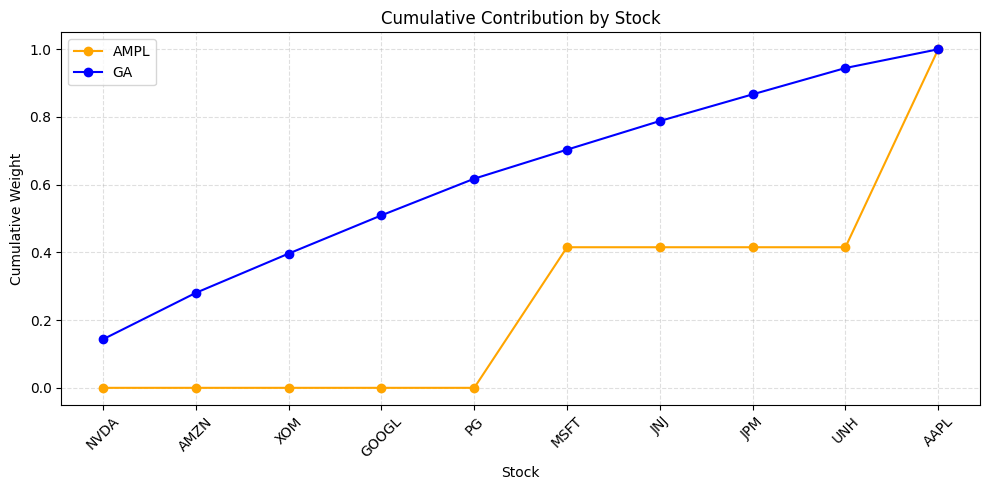

In [8]:
# Sort stocks by GA weights (or alphabetically if you prefer)
combined_sorted = combined.sort_values(by='GA', ascending=False)

# Calculate cumulative sum
cumulative = combined_sorted.cumsum()

# Plot
plt.figure(figsize=(10, 5))
plt.plot(cumulative['AMPL'], marker='o', label='AMPL', color='orange')
plt.plot(cumulative['GA'], marker='o', label='GA', color='blue')
plt.xticks(rotation=45)
plt.xlabel("Stock")
plt.ylabel("Cumulative Weight")
plt.title("Cumulative Contribution by Stock")
plt.legend()
plt.grid(True, linestyle='--', alpha=0.4)
plt.tight_layout()
plt.show()
